Package Installation

In [1]:
#!pip install src
#!pip install lifelines

Load packages to use

In [1]:
# load packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

import seaborn as sns
import statsmodels.api as sm # give you lots of stat

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
import lifelines
from datetime import date

Load raw Dataset

In [2]:
df = pd.read_csv('../Data/data_churn_model.csv', index_col=0)
df.head()

,Country,Employee_Pay_ST,Track,Level_Cat,Level,Effective_Start_DT,Effective_Ending_DT,Termination_Reason,Birth_DT,Edad,...,Media_hora_curso,Estado,Total_number_received_Feedback,Performance_feedback_AVG,Performance_Level_CD,Performance_Level,Potential_Level_CD,Potential_Level,Track_Code,TotalNumberOfficeEmployees
ID_Country,,,,,,,,,,,,,,,,,,,,,
2,MX,Active,SYINCO,5,Sr. Consultant,12/01/2001,1/29/2021,Still Active,16/09/1971,49,...,16.0,Activo,0.0,91.789248,2,Medium,0,No Employee info,8,1441
2,MX,Active,DEVELO,5,Sr. Consultant,8/23/2018,1/29/2021,Still Active,10/10/1966,54,...,10.0,Activo,19.0,91.630000,2,Medium,0,No Employee info,3,1441
2,MX,Active,CONSUL,6,Manager / Master,08/01/2009,1/29/2021,Still Active,03/09/1972,48,...,2.0,Activo,0.0,91.789248,0,High,0,No Employee info,2,1441
2,MX,Active,MNGSER,3,Experienced Consultant,11/16/2017,1/29/2021,Still Active,22/11/1970,49,...,14.0,Activo,0.0,91.789248,2,Medium,0,No Employee info,4,1441
2,MX,Active,PROJCT,6,Manager / Master,10/01/1995,1/29/2021,Still Active,25/06/1974,46,...,4.0,Activo,2.0,50.000000,2,Medium,1,RISING TALENT,5,1441


In [3]:
df['Effective_Ending_DT']= pd.to_datetime(df['Effective_Ending_DT'])
df['Effective_Start_DT']= pd.to_datetime(df['Effective_Start_DT'])
df['Duration'] = df['Effective_Ending_DT'] - df['Effective_Start_DT']

In [4]:
df.head()

,Country,Employee_Pay_ST,Track,Level_Cat,Level,Effective_Start_DT,Effective_Ending_DT,Termination_Reason,Birth_DT,Edad,...,Estado,Total_number_received_Feedback,Performance_feedback_AVG,Performance_Level_CD,Performance_Level,Potential_Level_CD,Potential_Level,Track_Code,TotalNumberOfficeEmployees,Duration
ID_Country,,,,,,,,,,,,,,,,,,,,,
2,MX,Active,SYINCO,5,Sr. Consultant,2001-12-01,2021-01-29,Still Active,16/09/1971,49,...,Activo,0.0,91.789248,2,Medium,0,No Employee info,8,1441,6999 days
2,MX,Active,DEVELO,5,Sr. Consultant,2018-08-23,2021-01-29,Still Active,10/10/1966,54,...,Activo,19.0,91.630000,2,Medium,0,No Employee info,3,1441,890 days
2,MX,Active,CONSUL,6,Manager / Master,2009-08-01,2021-01-29,Still Active,03/09/1972,48,...,Activo,0.0,91.789248,0,High,0,No Employee info,2,1441,4199 days
2,MX,Active,MNGSER,3,Experienced Consultant,2017-11-16,2021-01-29,Still Active,22/11/1970,49,...,Activo,0.0,91.789248,2,Medium,0,No Employee info,4,1441,1170 days
2,MX,Active,PROJCT,6,Manager / Master,1995-10-01,2021-01-29,Still Active,25/06/1974,46,...,Activo,2.0,50.000000,2,Medium,1,RISING TALENT,5,1441,9252 days


In [7]:
#df['Estado'] = df['Estado'].replace(['Inactivo','Activo'],[int(1),int(0)])
df.loc[df['Termination_Reason'] == 'Still Active', 'Churn'] = 0
df.loc[df['Termination_Reason'] != 'Still Active', 'Churn'] = 1


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3429 entries, 2 to 16
Data columns (total 67 columns):
 #   Column                          Non-Null Count  Dtype          
---  ------                          --------------  -----          
 0   Country                         3429 non-null   object         
 1   Employee_Pay_ST                 3429 non-null   object         
 2   Track                           3429 non-null   object         
 3   Level_Cat                       3429 non-null   int64          
 4   Level                           3429 non-null   object         
 5   Effective_Start_DT              3429 non-null   datetime64[ns] 
 6   Effective_Ending_DT             3429 non-null   datetime64[ns] 
 7   Termination_Reason              3429 non-null   object         
 8   Birth_DT                        3429 non-null   object         
 9   Edad                            3429 non-null   int64          
 10  Marital_CD                      3429 non-null   int64         

In [9]:
df['Churn'].unique()

array([0., 1.])

In [10]:
item_counts = df["Churn"].value_counts()
print(item_counts)

0.0    2421
1.0    1008
Name: Churn, dtype: int64


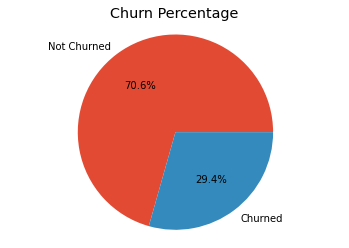

In [11]:
churn_labels = 'Not Churned', 'Churned'
plt.pie(item_counts, labels = churn_labels, autopct='%1.1f%%')
plt.title('Churn Percentage')
plt.axis('equal')
plt.show()

In [12]:
print(df.groupby("Prime_Skills")["Churn"].count())

Prime_Skills
.NET DEVELOPER                                                        409
ANGULAR                                                                48
BUSINESS CONSULTANT (PMO + PROCESSES + CHANGE MGT + BUSINESS CASE)     60
FINANCE                                                                 4
FUNCTIONAL ANALYST                                                    157
INFORMATICA POWERCENTER                                                41
IT                                                                     98
JAVA                                                                  388
JIRA (ZEPHYR)                                                          76
LINES OF SERVICES MANAGER                                              35
MICROFOCUS QC/ALM                                                     137
MICROSOFT DYNAMICS 365                                                 36
ORACLE                                                                 63
Other                    

In [13]:
print(df.groupby("Prime_Skills")["Churn"].sum())

Prime_Skills
.NET DEVELOPER                                                        144.0
ANGULAR                                                                17.0
BUSINESS CONSULTANT (PMO + PROCESSES + CHANGE MGT + BUSINESS CASE)     37.0
FINANCE                                                                 0.0
FUNCTIONAL ANALYST                                                     49.0
INFORMATICA POWERCENTER                                                12.0
IT                                                                     15.0
JAVA                                                                  137.0
JIRA (ZEPHYR)                                                          16.0
LINES OF SERVICES MANAGER                                               6.0
MICROFOCUS QC/ALM                                                      69.0
MICROSOFT DYNAMICS 365                                                  8.0
ORACLE                                                                 20.0

In [14]:
print(df.groupby("Track")["Churn"].count())

Track
ARCHTC      48
BUSMGT     116
CONSUL     306
DEVELO    1801
MNGSER     281
PROJCT      95
SERMGT      47
SUPPOR       6
SYINCO     729
Name: Churn, dtype: int64


In [15]:
print(df.groupby("Track")["Churn"].sum())

Track
ARCHTC      7.0
BUSMGT     24.0
CONSUL    106.0
DEVELO    599.0
MNGSER     54.0
PROJCT     27.0
SERMGT     11.0
SUPPOR      1.0
SYINCO    179.0
Name: Churn, dtype: float64


In [16]:
print(df.groupby("Duration")["Churn"].count())

Duration
0 days       4
1 days       2
2 days       2
5 days       1
6 days       1
            ..
8915 days    1
8955 days    1
9160 days    1
9252 days    1
9669 days    1
Name: Churn, Length: 1610, dtype: int64


In [17]:
print(df.groupby("Duration")["Churn"].sum())

Duration
0 days       4.0
1 days       2.0
2 days       2.0
5 days       1.0
6 days       1.0
            ... 
8915 days    0.0
8955 days    0.0
9160 days    0.0
9252 days    0.0
9669 days    0.0
Name: Churn, Length: 1610, dtype: float64


In [18]:
print(df.groupby("Termination_Reason")["Churn"].count())

Termination_Reason
Still Active                     2421
Vol - Compensation & Benefits     172
Vol - Job Abandonment               1
Vol - Other                        53
Vol - Personal                    154
Vol - Project Discomfort          106
Vol - Supervisor / Leadership      11
Vol - Training & Career Dev       491
Vol - Transfer NEORIS Office        2
Vol - Transfer to CEMEX            12
Vol - Transfer to client            5
Vol - Work Environment              1
Name: Churn, dtype: int64


In [20]:
print(df.groupby("Country")["Churn"].count())

Country
AR     735
BR      94
CL     146
CO      77
CZ      32
ES     807
HU       5
IN      11
MX    1465
PE      25
US      32
Name: Churn, dtype: int64


In [21]:
print(df.groupby("Country")["Churn"].sum())

Country
AR    268.0
BR     20.0
CL     55.0
CO     17.0
CZ     20.0
ES    248.0
HU      0.0
IN      1.0
MX    356.0
PE      8.0
US     15.0
Name: Churn, dtype: float64


In [22]:
print(df.groupby("Months_Worked")["Churn"].count())

Months_Worked
0      15
1      27
2      56
3      67
4      59
       ..
292     1
294     1
300     1
303     1
317     1
Name: Churn, Length: 231, dtype: int64


In [23]:
print(df.groupby("Months_Worked")["Churn"].sum())

Months_Worked
0      15.0
1      27.0
2      31.0
3      29.0
4      20.0
       ... 
292     0.0
294     0.0
300     0.0
303     0.0
317     0.0
Name: Churn, Length: 231, dtype: float64


In [27]:
df_by_month = df.groupby("Months_Worked")["Churn"].sum()

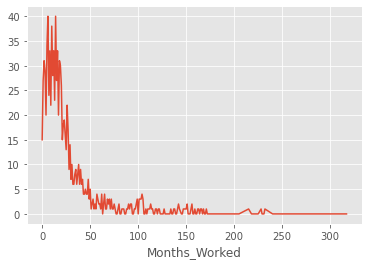

In [29]:
df_by_month.plot()

In [30]:
df_by_age = df.groupby("Edad")["Churn"].sum()

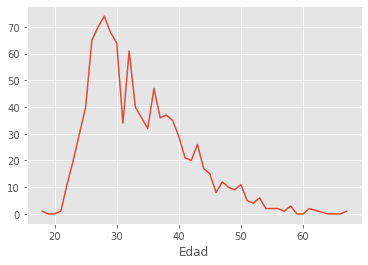

In [31]:
df_by_age.plot()

In [32]:
print(df.groupby("Department")["Churn"].count())

Department
303       39
D72       42
DH3       34
H48       51
Other    780
S04      235
S48       31
S51      136
S63      304
S64      929
S65       35
S66       58
S73       39
S76      259
T22       38
T25      151
T45      108
T57       67
T60       47
ZZ3       46
Name: Churn, dtype: int64


In [33]:
print(df.groupby("Department")["Churn"].sum())

Department
303        3.0
D72        7.0
DH3        0.0
H48        1.0
Other    374.0
S04        0.0
S48       31.0
S51        6.0
S63      304.0
S64       38.0
S65       35.0
S66       58.0
S73       39.0
S76       56.0
T22       38.0
T25        1.0
T45        6.0
T57        7.0
T60        4.0
ZZ3        0.0
Name: Churn, dtype: float64


In [34]:
print(df.groupby("Increase_2018_2019")["Churn"].count())

Increase_2018_2019
0.000000      3180
3.758906        83
10.330000        1
17.030000        1
19.920000        1
26.920000        1
28.950000        1
29.210000        1
30.000000       12
32.220000        1
32.500000        1
36.440000        1
36.750000        1
39.480000        1
39.800000        2
41.200000        1
43.300000        7
44.000000        1
44.650000        1
47.500000        4
47.780000        1
49.100000        1
49.170000        1
50.000000        1
51.750000        1
52.090000        1
52.300000        1
52.400000        1
52.700000        1
59.400000        1
60.100000       15
64.800000        1
65.800000        1
70.400000        1
75.500000        1
77.850000        1
77.900000        1
78.060000        1
79.700000        1
80.900000        1
82.000000        1
85.550000        1
86.000000        1
88.000000        1
88.100000        5
90.000000        1
90.200000        2
90.900000        1
91.600000        1
93.400000        1
93.610000        1
96.690000   

In [35]:
print(df.groupby("Increase_2018_2019")["Churn"].sum())

Increase_2018_2019
0.000000      993.0
3.758906        0.0
10.330000       0.0
17.030000       0.0
19.920000       0.0
26.920000       1.0
28.950000       0.0
29.210000       0.0
30.000000       2.0
32.220000       0.0
32.500000       0.0
36.440000       0.0
36.750000       0.0
39.480000       1.0
39.800000       1.0
41.200000       0.0
43.300000       0.0
44.000000       1.0
44.650000       0.0
47.500000       0.0
47.780000       0.0
49.100000       0.0
49.170000       1.0
50.000000       1.0
51.750000       0.0
52.090000       0.0
52.300000       0.0
52.400000       0.0
52.700000       0.0
59.400000       0.0
60.100000       0.0
64.800000       0.0
65.800000       0.0
70.400000       0.0
75.500000       1.0
77.850000       1.0
77.900000       1.0
78.060000       0.0
79.700000       1.0
80.900000       0.0
82.000000       0.0
85.550000       0.0
86.000000       0.0
88.000000       1.0
88.100000       0.0
90.000000       0.0
90.200000       0.0
90.900000       1.0
91.600000       0.0
9

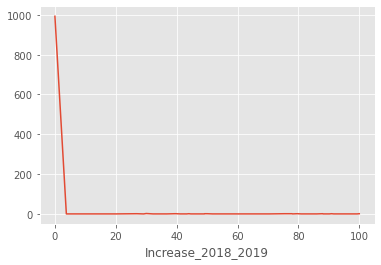

In [37]:
df_by_incr1 = df.groupby("Increase_2018_2019")["Churn"].sum()
df_by_incr1.plot()

In [39]:
print(df.groupby("Increase_2019_2020")["Churn"].sum())

Increase_2019_2020
0.000000      694.0
18.000000       0.0
18.656007       0.0
20.000000     289.0
21.000000       0.0
              ...  
89.000000       0.0
91.000000       0.0
92.000000       0.0
96.000000       0.0
100.000000      1.0
Name: Churn, Length: 64, dtype: float64


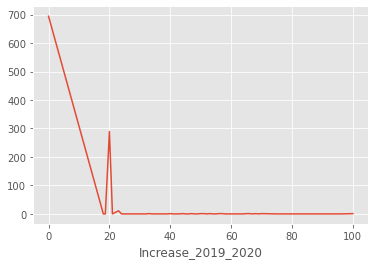

In [38]:
df_by_incr2 = df.groupby("Increase_2019_2020")["Churn"].sum()
df_by_incr2.plot()

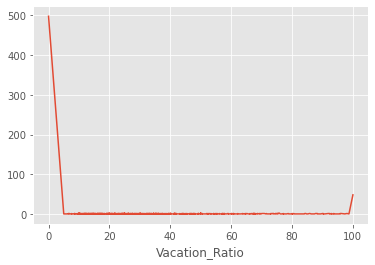

In [40]:
df_by_vacation = df.groupby("Vacation_Ratio")["Churn"].sum()
df_by_vacation.plot()

In [43]:
print(df.groupby("Marital_ST")["Churn"].count())

Marital_ST
C     131
D      64
M     830
S    2401
W       3
Name: Churn, dtype: int64


In [44]:
print(df.groupby("Marital_ST")["Churn"].sum())

Marital_ST
C     38.0
D     16.0
M    186.0
S    767.0
W      1.0
Name: Churn, dtype: float64


In [45]:
print(df.groupby("Gender")["Churn"].count())

Gender
0    2564
1     865
Name: Churn, dtype: int64


In [46]:
print(df.groupby("Gender")["Churn"].sum())

Gender
0    790.0
1    218.0
Name: Churn, dtype: float64


In [47]:
print(df.groupby("Level")["Churn"].count())

Level
Analyst                     640
Associate Director           35
Consultant                  645
Experienced Consultant      741
Manager / Master            215
Project / Technical Lead    112
Sr. Consultant              975
Sr. Manager / SME            66
Name: Churn, dtype: int64


In [48]:
print(df.groupby("Level")["Churn"].sum())

Level
Analyst                     246.0
Associate Director            9.0
Consultant                  210.0
Experienced Consultant      205.0
Manager / Master             37.0
Project / Technical Lead     24.0
Sr. Consultant              262.0
Sr. Manager / SME            15.0
Name: Churn, dtype: float64
